# Clase 13: introducción a los datos
En esta clase revisaremos como importar datos, diferentes formatos que podemos utilizar y algunos problemas típicos a la hora del manejo de información. 


La librería que vamos a ocupar para el manejo de datos es `pandas`. 
- La documentación de `pandas` la pueden encontrar en el link 1: https://pandas.pydata.org/docs/
- La documentación de read_csv la encuentran en el link 2: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Conceptos clave: 
- Pandas
- DataFrame
- Delimitador de miles y decimales
- Tipo de variable
- Index

## 1. Introducción

In [15]:
import pandas as pd

Para importar una base de datos en formato `csv`vamos a utilizar `pd.read_csv(ruta/archivo)`

En el caso de Windows llamamos la ruta con doble "$\backslash \backslash$", por ejemplo: "C:$\backslash \backslash$Users$\backslash \backslash$..."

Vamos a utilizar una base csv del banco central con información de empleo. Lo primero que llama la atención es que la base importa mal debido al delimitador, la base viene con ";" y por default viene ",". 

In [16]:
pd.read_csv("/home/felix/Dropbox/Computational_Economics/Intro_python/2021_S2/Clases/clase13_base1.csv")

,,,,,,Periodo;1.Total;2.Empleadores;3.Cuenta Propia;4.Asalariados;5.Personal de servicio;6.Familiar no remunerado
mar.2010;7.156,21;318,32;1.289,68;5.141,76;325,38;81,8
abr.2010;7.198,78;324,94;1.332,33;5.114,80;331,31;95,39
may.2010;7.181,90;326,95;1.346,54;5.080,65;328,56;99,21
jun.2010;7.221,58;328,03;1.384,28;5.074,00;327,60;107,68
jul.2010;7.256,52;333,82;1.390,03;5.081,93;339,44;111,29
...,...,...,...,...,...,...
nov.2020;7.916,72;248,89;1.568,05;5.833,68;188,43;77,66
dic.2020;8.026,22;234,57;1.588,14;5.927,28;194,91;81,32
ene.2021;8.121,42;237,25;1.610,63;6.000,74;197,43;75,36
feb.2021;8.167,62;245,25;1.634,08;6.018,35;198,73;71,20


Para cambiar el delimitador vamos a usar `delimiter`

In [17]:
pd.read_csv("/home/felix/Dropbox/Computational_Economics/Intro_python/2021_S2/Clases/clase13_base1.csv", delimiter=";")

,Periodo,1.Total,2.Empleadores,3.Cuenta Propia,4.Asalariados,5.Personal de servicio,6.Familiar no remunerado
0,mar.2010,"7.156,21","318,32","1.289,68","5.141,76","325,38","81,08"
1,abr.2010,"7.198,78","324,94","1.332,33","5.114,80","331,31","95,39"
2,may.2010,"7.181,90","326,95","1.346,54","5.080,65","328,56","99,21"
3,jun.2010,"7.221,58","328,03","1.384,28","5.074,00","327,60","107,68"
4,jul.2010,"7.256,52","333,82","1.390,03","5.081,93","339,44","111,29"
...,...,...,...,...,...,...,...
128,nov.2020,"7.916,72","248,89","1.568,05","5.833,68","188,43","77,66"
129,dic.2020,"8.026,22","234,57","1.588,14","5.927,28","194,91","81,32"
130,ene.2021,"8.121,42","237,25","1.610,63","6.000,74","197,43","75,36"
131,feb.2021,"8.167,62","245,25","1.634,08","6.018,35","198,73","71,20"


Si el archivo se encuentra en la misma carpeta que el Jupyter se puede llamar sólo con el nombre del csv. 

In [18]:
pd.read_csv("clase13_base1.csv", delimiter=";")

,Periodo,1.Total,2.Empleadores,3.Cuenta Propia,4.Asalariados,5.Personal de servicio,6.Familiar no remunerado
0,mar.2010,"7.156,21","318,32","1.289,68","5.141,76","325,38","81,08"
1,abr.2010,"7.198,78","324,94","1.332,33","5.114,80","331,31","95,39"
2,may.2010,"7.181,90","326,95","1.346,54","5.080,65","328,56","99,21"
3,jun.2010,"7.221,58","328,03","1.384,28","5.074,00","327,60","107,68"
4,jul.2010,"7.256,52","333,82","1.390,03","5.081,93","339,44","111,29"
...,...,...,...,...,...,...,...
128,nov.2020,"7.916,72","248,89","1.568,05","5.833,68","188,43","77,66"
129,dic.2020,"8.026,22","234,57","1.588,14","5.927,28","194,91","81,32"
130,ene.2021,"8.121,42","237,25","1.610,63","6.000,74","197,43","75,36"
131,feb.2021,"8.167,62","245,25","1.634,08","6.018,35","198,73","71,20"


El resultado es una estructura del tipo `fila-columna` que podemos guardar en una variable que llamaremos `DataFrame`. 

Un `DataFrame` corresponde a una estructura de datos del tipo fila-columna (similar a una hoja de excel) en el que podemos guardar información de diferentes `types`. Los DataFrame tienen un índice en la primera columna que parte en 0. 

Nuestro DataFrame tiene 133 filas y 7 columnas, donde el índice va de 0 a 132. 


In [19]:
df = pd.read_csv("clase13_base1.csv", delimiter=";")

## 2. Accediendo a un DataFrame
La primera mirada a nustros datos se la vamos a dar con la función `head()`, esta nos muestra un resumen de la tabla. Para esto ponemos "nombre del DataFrame"+ "." + "head()".

Esto nos va a mostrar las columnas de la base y las primeras 5 filas. 

In [20]:
df.head()

,Periodo,1.Total,2.Empleadores,3.Cuenta Propia,4.Asalariados,5.Personal de servicio,6.Familiar no remunerado
0,mar.2010,"7.156,21","318,32","1.289,68","5.141,76","325,38","81,08"
1,abr.2010,"7.198,78","324,94","1.332,33","5.114,80","331,31","95,39"
2,may.2010,"7.181,90","326,95","1.346,54","5.080,65","328,56","99,21"
3,jun.2010,"7.221,58","328,03","1.384,28","5.074,00","327,60","107,68"
4,jul.2010,"7.256,52","333,82","1.390,03","5.081,93","339,44","111,29"


Podemos decir específicamente cuántas filas queremos ver colocando el número dentro del paréntesis de head(10).

In [21]:
df.head(10)

,Periodo,1.Total,2.Empleadores,3.Cuenta Propia,4.Asalariados,5.Personal de servicio,6.Familiar no remunerado
0,mar.2010,"7.156,21","318,32","1.289,68","5.141,76","325,38","81,08"
1,abr.2010,"7.198,78","324,94","1.332,33","5.114,80","331,31","95,39"
2,may.2010,"7.181,90","326,95","1.346,54","5.080,65","328,56","99,21"
3,jun.2010,"7.221,58","328,03","1.384,28","5.074,00","327,60","107,68"
4,jul.2010,"7.256,52","333,82","1.390,03","5.081,93","339,44","111,29"
5,ago.2010,"7.289,22","333,77","1.430,97","5.080,20","339,49","104,79"
6,sep.2010,"7.389,47","339,06","1.477,55","5.130,21","338,02","104,63"
7,oct.2010,"7.414,43","343,68","1.485,61","5.150,80","331,05","103,29"
8,nov.2010,"7.503,09","347,12","1.486,07","5.216,86","341,96","111,08"
9,dic.2010,"7.572,32","340,32","1.486,32","5.294,66","342,20","108,82"


La función `dtypes` nos va a describir la información dentro de la base de datos.

In [22]:
df.dtypes

Periodo                     object
1.Total                     object
2.Empleadores               object
3.Cuenta Propia             object
4.Asalariados               object
5.Personal de servicio      object
6.Familiar no remunerado    object
dtype: object

El type `object` corresponde a un dato del tipo texto, como una palabra. En este caso es poco intuitivo frente al tipo de datos que estamos usando. Deberíamos esperar que la base fuese en su mayoría del tipo numérico (Float, Int).  

Para esto podemos especificar dos cosas: 
- Decimal: usamos el argumento `decimal="separador"`. 
- Separador de miles: usamos el argumento `thousands="separador"`

Esto es relevante porque según la configuración del computador e idioma las bases pueden venir con separadores "." o ",". En nuestro caso la base viene con separador de decimal "," y con separador de miles ".". 

In [23]:
#1. Guarda el DataFrame, muestra las columnas y la cantidad de filas y columnas

In [24]:
#IMportar datos
df = pd.read_csv("clase13_base1.csv", delimiter=";", decimal=",", thousands='.')
#Muestra los tipos
print(df.dtypes)
#Muestra columnas
print(df.columns)
#Mostrar N fila- M columna
print(df.shape)

Periodo                      object
1.Total                     float64
2.Empleadores               float64
3.Cuenta Propia             float64
4.Asalariados               float64
5.Personal de servicio      float64
6.Familiar no remunerado    float64
dtype: object
Index(['Periodo', '1.Total', '2.Empleadores', '3.Cuenta Propia',
       '4.Asalariados', '5.Personal de servicio', '6.Familiar no remunerado'],
      dtype='object')
(133, 7)


Para ver las columnas del DataFrame usamos `columns`

In [25]:
df.columns

Index(['Periodo', '1.Total', '2.Empleadores', '3.Cuenta Propia',
       '4.Asalariados', '5.Personal de servicio', '6.Familiar no remunerado'],
      dtype='object')

Las dimensiones fila-columna las podemos ver mediante `shape`. Esta viene en formato tupla (fila,columna)

In [26]:
df.shape

(133, 7)

Para ver el final de la tabla podemos usar `tail()`

In [27]:
df.tail()

,Periodo,1.Total,2.Empleadores,3.Cuenta Propia,4.Asalariados,5.Personal de servicio,6.Familiar no remunerado
128,nov.2020,7916.72,248.89,1568.05,5833.68,188.43,77.66
129,dic.2020,8026.22,234.57,1588.14,5927.28,194.91,81.32
130,ene.2021,8121.42,237.25,1610.63,6000.74,197.43,75.36
131,feb.2021,8167.62,245.25,1634.08,6018.35,198.73,71.20
132,mar.2021,8148.21,246.92,1646.38,5978.29,204.48,72.14


Para revisar una columna en específico podemos usar diferentes mecanismos

In [28]:
#Caso 1
df['Periodo']
#Caso 2
df.Periodo

0      mar.2010
1      abr.2010
2      may.2010
3      jun.2010
4      jul.2010
         ...   
128    nov.2020
129    dic.2020
130    ene.2021
131    feb.2021
132    mar.2021
Name: Periodo, Length: 133, dtype: object

¿Qué pasa cuando el nombre de nuestra columna viene con espacios? ¿Podemos usar el caso 2? 

In [29]:
#Funciona
df['3.Cuenta Propia']
#No Funciona
df.'3.Cuenta Propia'

SyntaxError: invalid syntax (<ipython-input-29-3e2cc8594c50>, line 4)

Por esta razón es fundamental que los nombres sean simples, en caso que tengan más de una palabra separar con "_". 

## 3. Manipulando el DataFrame

Lo primero que haremos es modificar el nombre de las variables. Para esto podemos usar el la función `rename()` y un `diccionario` con {'nombre_antiguo':'nombre_nuevo'}.

In [30]:
df.rename(columns={'1.Total': 'TOT', '2.Empleadores':'EMP', '3.Cuenta Propia':'CP', '4.Asalariados':'ASA', '5.Personal de servicio':'PdS', '6.Familiar no remunerado':'FnR'})

,Periodo,TOT,EMP,CP,ASA,PdS,FnR
0,mar.2010,7156.21,318.32,1289.68,5141.76,325.38,81.08
1,abr.2010,7198.78,324.94,1332.33,5114.80,331.31,95.39
2,may.2010,7181.90,326.95,1346.54,5080.65,328.56,99.21
3,jun.2010,7221.58,328.03,1384.28,5074.00,327.60,107.68
4,jul.2010,7256.52,333.82,1390.03,5081.93,339.44,111.29
...,...,...,...,...,...,...,...
128,nov.2020,7916.72,248.89,1568.05,5833.68,188.43,77.66
129,dic.2020,8026.22,234.57,1588.14,5927.28,194.91,81.32
130,ene.2021,8121.42,237.25,1610.63,6000.74,197.43,75.36
131,feb.2021,8167.62,245.25,1634.08,6018.35,198.73,71.20


Si hacemos sólo `df.rename()` no se modifica el DataFrame, entonces tenemos dos opciones: 1) creamos uno nuevo o 2) modificamos el que ya existe.  

In [31]:
#1. Creamos lun DF nuevo 
df2 = df.rename(columns={'1.Total': 'TOT', '2.Empleadores':'EMP', '3.Cuenta Propia':'CP', '4.Asalariados':'ASA', '5.Personal de servicio':'PdS', '6.Familiar no remunerado':'FnR'})

#2. Modificamos el que existe
df = df.rename(columns={'1.Total': 'TOT', '2.Empleadores':'EMP', '3.Cuenta Propia':'CP', '4.Asalariados':'ASA', '5.Personal de servicio':'PdS', '6.Familiar no remunerado':'FnR'})

In [32]:
df.head()

,Periodo,TOT,EMP,CP,ASA,PdS,FnR
0,mar.2010,7156.21,318.32,1289.68,5141.76,325.38,81.08
1,abr.2010,7198.78,324.94,1332.33,5114.80,331.31,95.39
2,may.2010,7181.90,326.95,1346.54,5080.65,328.56,99.21
3,jun.2010,7221.58,328.03,1384.28,5074.00,327.60,107.68
4,jul.2010,7256.52,333.82,1390.03,5081.93,339.44,111.29


Una mirada inicial a una variable podemos darla con la función `describe()`. Esta función nos entrega una resumen estadístico de la variable. 

In [33]:
#1. Llamamos una variable df.variable
df.TOT.describe()

#2. Llamamos df['variable']
df['TOT'].describe()

count     133.000000
mean     8187.411504
std       504.204366
min      7073.190000
25%      7844.780000
50%      8202.890000
75%      8535.210000
max      9118.180000
Name: TOT, dtype: float64

Podemos sacar una estadística en particular

In [34]:
print("min:", df.TOT.min())
print("max:", df.TOT.max())
print("mean:", df.TOT.mean())
print("std:", df.TOT.std())
print("count:", df.TOT.count())

min: 7073.19
max: 9118.18
mean: 8187.411503759398
std: 504.20436565714255
count: 133


La variable `Periodo` sigue siendo del tipo Objeto (texto), podemos crear una variable del tipo fecha. Para esto vamos a hacer dos cosas: 1) crear una variable en formato fecha y 2) agregar esta variable al DataFrame. 

- Para crear una variable del tipo fecha podemos usar la función `date_range(fecha_inicio, periodos, frecuencia)`. En el siguiente link (link 3) encuentran detalle de como variables del tipo fecha en un DataFrame: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html. 
- Para anexar una variable al DataFrame colocamos `df['nombre_variable'] = variable`.

In [35]:
#Creamos una variable del tipo fecha con la función
Date = pd.date_range("2010-03-01", periods=133, freq="M")

#Anexamos la variable nueva
df['Date'] = Date

#Vemos el resultado
df.dtypes

Periodo            object
TOT               float64
EMP               float64
CP                float64
ASA               float64
PdS               float64
FnR               float64
Date       datetime64[ns]
dtype: object

Vamos a guardar los meses y años por separados en el DataFrame. Para esto utilizamos `DatetimeIndex` (abreviamos dt) que nos permite extraer el segundos/dia/mes/año de una variable del tipo `datetime`, por ejemplo usando `month` y `year`.

In [36]:
#Guardamos el mes en una variable 
df['mes'] = df['Date'].dt.month

#Guardamos el año en una variable
df['year'] = df['Date'].dt.year

#Vemos el resultado
print(df.dtypes)
df.head()

Periodo            object
TOT               float64
EMP               float64
CP                float64
ASA               float64
PdS               float64
FnR               float64
Date       datetime64[ns]
mes                 int64
year                int64
dtype: object


,Periodo,TOT,EMP,CP,ASA,PdS,FnR,Date,mes,year
0,mar.2010,7156.21,318.32,1289.68,5141.76,325.38,81.08,2010-03-31,3,2010
1,abr.2010,7198.78,324.94,1332.33,5114.80,331.31,95.39,2010-04-30,4,2010
2,may.2010,7181.90,326.95,1346.54,5080.65,328.56,99.21,2010-05-31,5,2010
3,jun.2010,7221.58,328.03,1384.28,5074.00,327.60,107.68,2010-06-30,6,2010
4,jul.2010,7256.52,333.82,1390.03,5081.93,339.44,111.29,2010-07-31,7,2010


Podemos agrupar una variable mediante `groupby`. Luego podemos aplicar funciones básicas como `mean()`, `std()`, `sum()`, etc. 

In [37]:
df_agrupado = df.groupby('year')
df_agrupado.mean()

,TOT,EMP,CP,ASA,PdS,FnR,mes
year,,,,,,,
2010,7318.352000,333.601000,1410.938000,5136.587000,334.501000,102.726000,7.5
2011,7676.545833,349.602500,1488.466667,5382.360833,359.097500,97.016667,6.5
2012,7858.610833,323.438333,1460.165833,5626.480000,353.575000,94.954167,6.5
2013,8023.047500,334.418333,1484.029167,5766.081667,336.561667,101.956667,6.5
2014,8150.107500,338.969167,1569.675000,5800.595833,336.685000,104.185000,6.5
2015,8273.739167,344.422500,1593.640833,5919.330833,319.370833,96.973333,6.5
2016,8391.921667,334.027500,1686.861667,5945.020000,330.251667,95.760000,6.5
2017,8574.332500,371.210833,1777.026667,6008.260833,323.455000,94.375833,6.5
2018,8773.940000,363.481667,1800.942500,6185.576667,323.193333,100.750000,6.5


Lo anterior podemos hacerlo sobre una o un grupo de variables específicas. Para esto hacemos lo siguiente: 
- Seleccionamos las variablers sobre las que vamos a trabajar mediante una lista: df[['TOT', 'year']]. Tiene que estar la variable sobre la que quiero tener el análisis (TOT) y la que voy a agrupar (year).  
- Aplicamos la función para agrupar y la variable: groupby('year'). 

In [38]:
df_agrupado = df[['TOT', 'year']].groupby('year')
df_agrupado.mean()

,TOT
year,
2010,7318.352000
2011,7676.545833
2012,7858.610833
2013,8023.047500
2014,8150.107500
2015,8273.739167
2016,8391.921667
2017,8574.332500
2018,8773.940000


Si analizamos el resultado de df_agrupado.mean() tiene dos elementos: 
- index: variable sobre la que se agrupó, esta la llamamos con `.index`
- Variables relevantes: sobre las que hicimos el análisis, en este caso TOT. La llamamos con ['TOT']

$$f(x) = 10$$

In [39]:
#Index
print("index:", df_agrupado.mean().index)

#TOT
print("TOT:", df_agrupado.mean()['TOT'])

index: Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
            2021],
           dtype='int64', name='year')
TOT: year
2010    7318.352000
2011    7676.545833
2012    7858.610833
2013    8023.047500
2014    8150.107500
2015    8273.739167
2016    8391.921667
2017    8574.332500
2018    8773.940000
2019    8953.679167
2020    7932.822500
2021    8145.750000
Name: TOT, dtype: float64


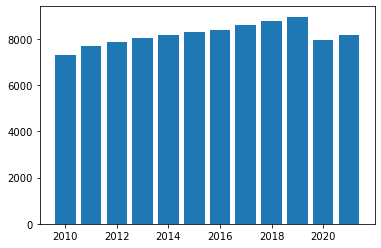

In [40]:
import matplotlib.pyplot as plt
x = df_agrupado.mean().index
y = df_agrupado.mean()['TOT']
plt.bar(x, y)
plt.show()

**Con esto podemos empezar a utilizar una base de datos y mostrar algunos resultados!** 
- Para leer datos de excel podemos usar `pd.read_excel`.
- Para leer datos de stata podemos usar `pd.read_stata`. 


In [41]:
df_agrupado = df[['TOT', 'year']].groupby('year')
df_agrupado.mean()

,TOT
year,
2010,7318.352000
2011,7676.545833
2012,7858.610833
2013,8023.047500
2014,8150.107500
2015,8273.739167
2016,8391.921667
2017,8574.332500
2018,8773.940000


In [42]:
df_agrupado = df[['TOT', 'year']].groupby('year')
# df_agrupado.head()